<a href="https://colab.research.google.com/github/pompompurin-queso/Data-Science-Summer-Intern-assignment-2024/blob/main/Wolt_data_science_intern_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal of the Data Science project: from analyzing the data points available, the owner of this project has chosen this problem statement and end goal for the project:

**Problem statement:** How does weather conditions affects the presence of the courier partners online?

- When there is a high demand for delivery services, more courier partners will go online to meet the demand. And vice versa.
- However, if the weather is bad, some couriers, especially those delivering in bicycles/bikes are less likely to deliver.

>ML Model: Using weather data points to predict the number of courier_partners_online.


**How this model will be helpful**:
- Improve delivery operations by allocating the resources and delivery times to each driver to meet the demand of the orders for the customers, as well as optimizing the routes and delivery bundles for the couriers.


**End goal of the project for the company**: Saving cost, higher customer satisfaction, which in turn leads to higher revenues for the company.

In [1]:
# Download the dataset
!wget https://raw.githubusercontent.com/woltapp/data-science-internship-2024/main/daily_cp_activity_dataset.csv

--2024-01-31 14:51:42--  https://raw.githubusercontent.com/woltapp/data-science-internship-2024/main/daily_cp_activity_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22068 (22K) [text/plain]
Saving to: ‘daily_cp_activity_dataset.csv.1’

daily_cp_activity_d 100%[===================>]  21.55K  --.-KB/s    in 0.002s  

2024-01-31 14:51:42 (10.9 MB/s) - ‘daily_cp_activity_dataset.csv.1’ saved [22068/22068]



In [2]:
data = 'daily_cp_activity_dataset.csv'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

data = pd.read_csv('daily_cp_activity_dataset.csv', encoding='utf-8')


In [5]:
# Check that the data is a dataframe
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [6]:
data.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.0
1,2021-05-02,927,19.88,0.55,0.0
2,2021-05-03,40,16.88,0.60,0.0
3,2021-05-04,51,21.88,0.53,0.0
4,2021-05-05,50,21.11,0.54,0.0


In [7]:
data.dtypes

date                        object
courier_partners_online      int64
temperature                float64
relative_humidity          float64
precipitation              float64
dtype: object

- All data points are numeric with excepted to date being object dtype representing calendar dates

In [8]:
data.describe()

,courier_partners_online,temperature,relative_humidity,precipitation
count,761.000000,731.000000,761.000000,756.000000
mean,72.417871,17.532585,0.653193,0.914735
std,96.039679,10.007564,0.171553,1.749988
min,34.000000,-9.980000,0.430000,0.000000
25%,58.000000,10.930000,0.520000,0.000000
50%,66.000000,18.630000,0.590000,0.000000
75%,72.000000,24.410000,0.790000,0.910000
max,1506.000000,37.950000,1.000000,12.900000


- courier_partners_online: median (50%) < mean -> skewed to the right.

- temperature: the mean and median are close, which signifies a symmetric distribution.

- relative_humidity: the mean and median are close, which signifies a symmetric distribution.

- precipitation: median is 0 while mean is 0.9. this signify that there are some extreme values in the datapoint that the mean is affected by. but it is a rain data point so there could just be some very heavy rain days.




- The std of courier_partners_online are very high, measuring to 96. This could have a few possible explanations: their working hours, demand for courier services, traffic, and specifically in our dataset, weather conditions. Due to this high std, it could be difficult to predict accurately the amount of courier partners that will be online on certain days.

- The std of temperature of 10 is quite high. This could be because the data is collected over a long period of time -> contains temperature of different seasons.

- The stds of relative_humidity and precipitation are low, which means that data in the columns are more consistent and less spread out.

In [9]:
data.shape

(761, 5)

In [10]:
# Checking for missing values
missing_values = data.isnull().sum()
print(missing_values)

date                        0
courier_partners_online     0
temperature                30
relative_humidity           0
precipitation               5
dtype: int64


In [11]:
# Check the data type of the date column
data["date"].dtype

dtype('O')

In [12]:
# Change the date column from object data type to datetime data type
data["date"] = pd.to_datetime(data["date"])

In [13]:
data["date"].dtype

dtype('<M8[ns]')

There are 30 missing values in the temperature column and 5 missing values in the precipitation column.

## This is really fun to discover. Let's plot the data points to talk to the data and understand how we can get more of an understanding out of it.

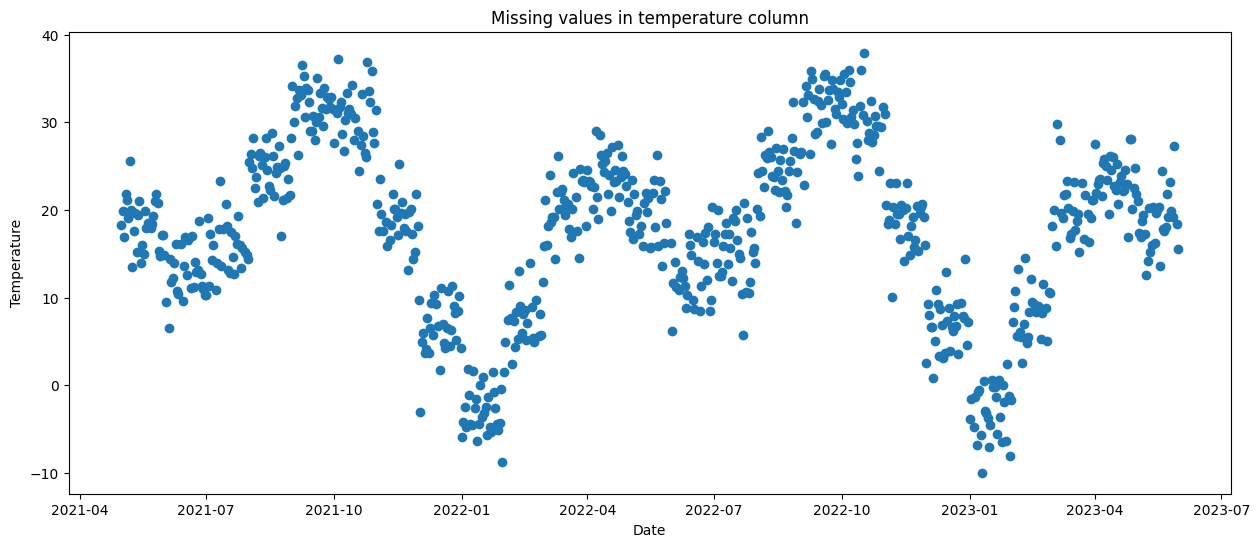

In [14]:
plt.figure(figsize=(15, 6))

plt.scatter(data['date'], data['temperature'])
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Missing values in temperature column')
plt.show()

- The gaps represent the missing values. We could see that the missing values are not constant on a specific period/month/year.

- Temperature is often measured by sensors, so missing temperature values could due to sensor malfunctions, mistakes in data collection.

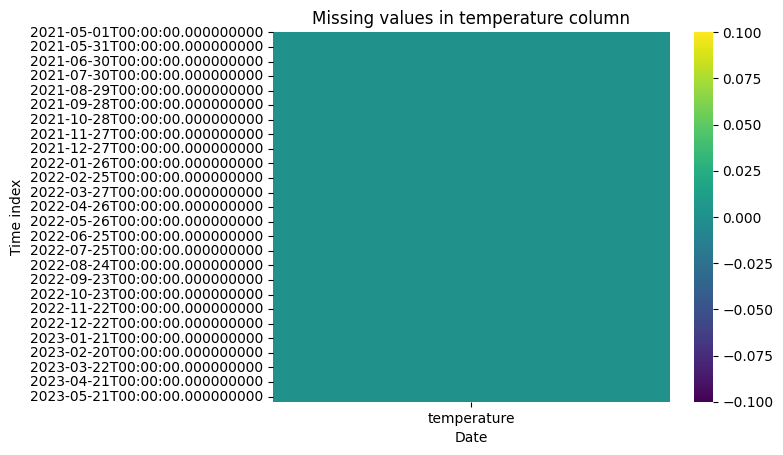

In [15]:
import seaborn as sns

sns.heatmap(data.pivot_table(values='temperature', index='date', aggfunc='count').isnull(), cmap='viridis')
plt.xlabel('Date')
plt.ylabel('Time index')
plt.title('Missing values in temperature column')
plt.show()

## Dealing with missing values using linear interpolation: rationale and operation

- This dataset spans over a large period of time (2021-2023), so it would not be a smart choice to use mean/median amputation as the temperature varies greatly through seasons and climate change throughout the years.

- Temperature is somthing that is more consistent through a small period of time (in the same week/month).


- Consider all those factors above, the most efficient imputation to use is **linear interpolation.**

- Linear interpolation replaces missing values with a linear function that connects the nearest observed values in the same time series.

In [16]:
# Linear Interpolation for missing values
data["temperature"] = data["temperature"].interpolate(method="linear")

Precipitation also follows the same qualities as the temperature data as something consistent during a small period of time (same week/month). We will also use linear interpolation to fill in the missing values for the null data points in precipitation

In [17]:
data["precipitation"] = data["precipitation"].interpolate(method="linear")

In [18]:
data.isnull().sum()

date                       0
courier_partners_online    0
temperature                0
relative_humidity          0
precipitation              0
dtype: int64

## Check for outliers

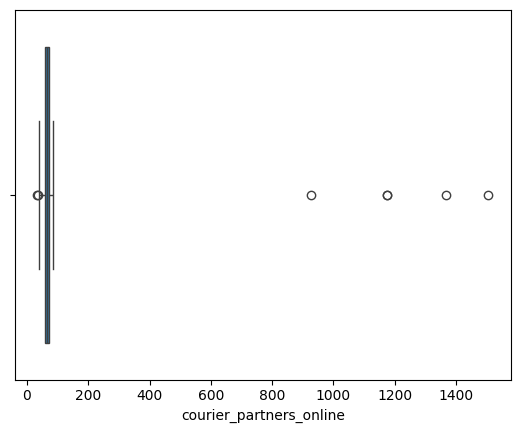

In [19]:
# courier_partners_online column
sns.boxplot(x=data['courier_partners_online'])
plt.show()


- courier_partners_online has very extreme outliers, specifically 4 extreme outliers. We will have to drop the rows containing these outliers to reduce the noise in our dataset, which could affect our model later on.

In [20]:
# Dropping the outliers > 800 for courier_partners_online
data = data[data['courier_partners_online'] <= 800]

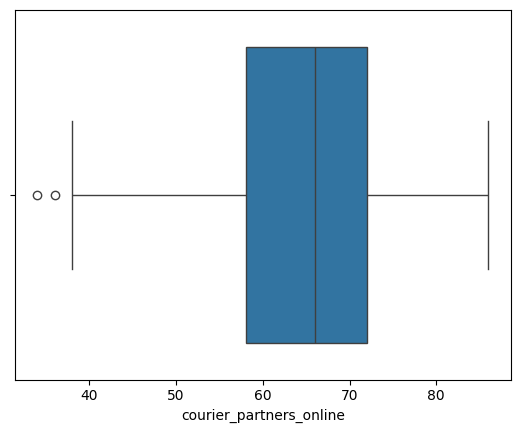

In [21]:
# Check the courier_partners_online column again for outliers (if any )
sns.boxplot(x=data['courier_partners_online'])
plt.show()

In [22]:
# Dropping the outliers < 40 for courier_partners_online
data = data[data['courier_partners_online'] > 40]

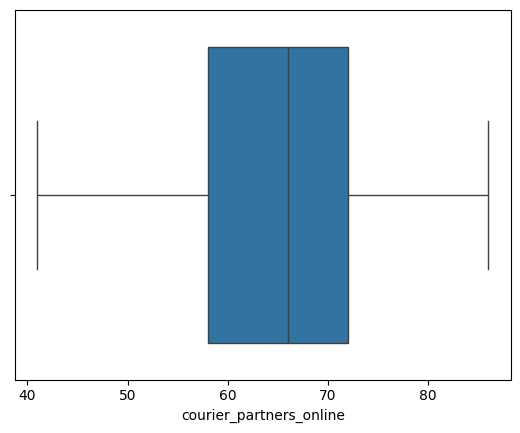

In [23]:
# Visualize the plot for courier_partners_online again
sns.boxplot(x=data['courier_partners_online'])
plt.show()

- The column is finished being handled for outliers and data column is ready for model building.

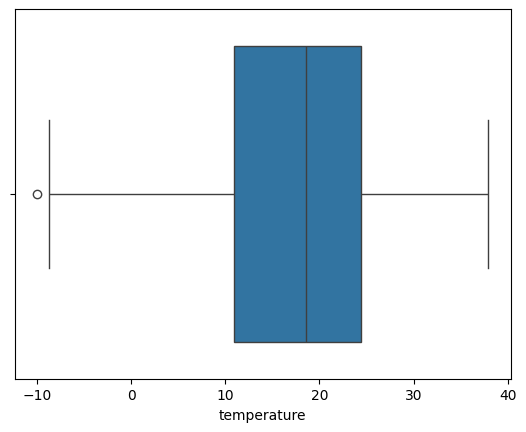

In [24]:
# temperature column
sns.boxplot(x=data['temperature'])
plt.show()

- Temperature column looks good and show no signs of having extreme outliers, aside from the -10 degree celcius. However temperature do get down to -10 degrees on cold day, and is an important data point to make meaning for the dataset. Thus, no alterations will be made for the temperature column.

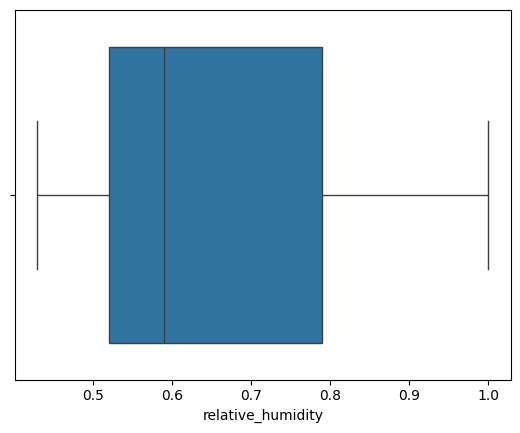

In [25]:
# relative_humidity column
sns.boxplot(x=data['relative_humidity'])
plt.show()

- Relative humidity column looks good and show no signs of having extreme outliers.

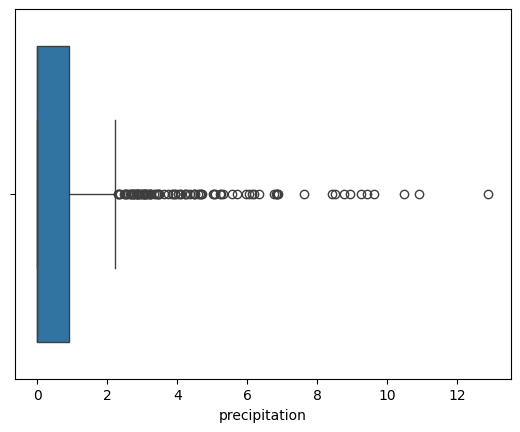

In [26]:
# precipitation column
sns.boxplot(x=data['precipitation'])
plt.show()

- Precipiation has values outside of the whisker plots but they are plentiful and doesn't represent an outlier pattern so there is no need for alterations.

To do:
- Univariate analysis: Histograms for numerical variables, Bar plots for categorical variables

To do:
- Bivariate analysis: Scatter plots for relationships between numerical variables, Box plots to compare distributions between groups

To do:
- Multivariate analysis: Correlation matrix, Heatmap

<ipython-input-27-c7c16e2fddfe>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


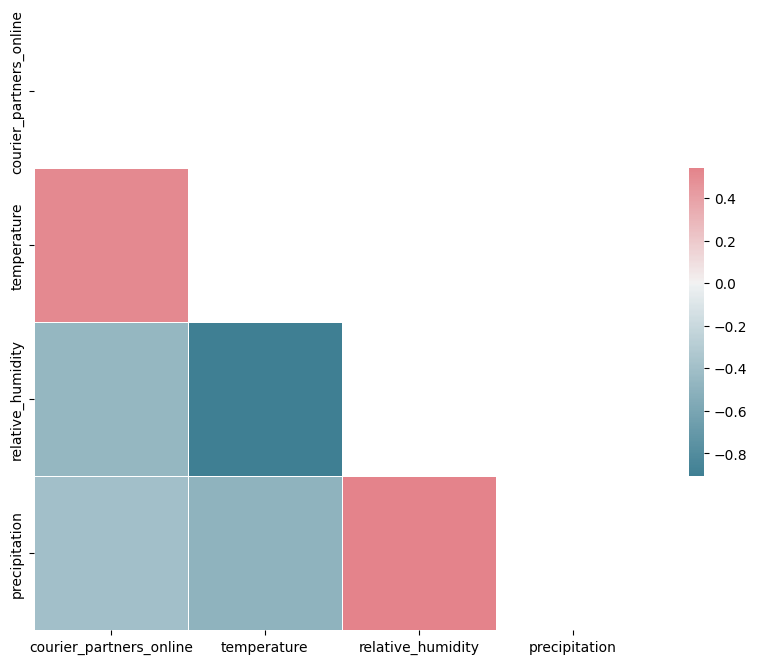

In [27]:
import numpy as np

correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
fig, ax = plt.subplots(figsize=(10, 8))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

- Based on the heatmap, temperature has the highest correlation with courier_partners_online, followed by relative_humidity and then precipitation.

- Temperature has a positive correlation with courier_partners_online, which means that as the temperature increases, the number of courier partner online also does. This could either be that:
 - Drivers are more likely to do courier work when the weather is warmer.
 - Number of couriers online could be a proxy for demands from customers more willing to order and pick up deliveries when the weather is warmer.

- In contrast, relative_humidity, followed by precipitation, both have a negative correlation with courier_partners_online. This means that as relative humidity and precipitation increase, the number of courier partners online tend to decrease.

## Chosen Model 1: LSTM Model
Reasons:
- They are able to capture complex temporal dependency patterns, even when stacked in multi-layer networks . LSTMs are effective in capturing long-term dependencies and can handle highly nonlinear and non-stationary data.

Model architecture in brief:
- Input layer: precipitation, relative_humidity, temperature.
- LSTM layers: learning the temporal dependencies between the input features.
- Output layer: prediction of the courier partners online.

Evaluation metrics:
- MSE
- RMSE

In [28]:
# Import libraries for making the model
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.losses import mean_squared_error

In [29]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [30]:
# Specify input features and target variable
features = data[["precipitation", "relative_humidity", "temperature"]]
target = data["courier_partners_online"]

In [31]:
target.shape

(752,)

- Target is a 1D array. We need to make it into a 2D array because the MinMaxScaler expects input data to be in a 2D array format. It is good practice to provide data to models in a 2D array format

In [32]:
# Reshape the target variable into a 2D array with one column
target = target.values.reshape(-1, 1)

In [33]:
# Features + target variable scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target)

In [34]:
# Split the data into training and testing
train_size = int(len(features_scaled) * 0.8)
train_features, test_features = features_scaled[:train_size], features_scaled[train_size:]
train_target, test_target = target_scaled[:train_size], target_scaled[train_size:]

In [35]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(train_features.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss=mean_squared_error, optimizer="adam")

In [36]:
# Train the model
history = model.fit(train_features, train_target, epochs = 10, batch_size = 16, verbose = 2)

Epoch 1/10
38/38 - 5s - loss: 0.1453 - 5s/epoch - 138ms/step
Epoch 2/10
38/38 - 0s - loss: 0.0538 - 232ms/epoch - 6ms/step
Epoch 3/10
38/38 - 0s - loss: 0.0442 - 214ms/epoch - 6ms/step
Epoch 4/10
38/38 - 0s - loss: 0.0373 - 271ms/epoch - 7ms/step
Epoch 5/10
38/38 - 0s - loss: 0.0339 - 251ms/epoch - 7ms/step
Epoch 6/10
38/38 - 0s - loss: 0.0337 - 202ms/epoch - 5ms/step
Epoch 7/10
38/38 - 0s - loss: 0.0343 - 274ms/epoch - 7ms/step
Epoch 8/10
38/38 - 0s - loss: 0.0332 - 183ms/epoch - 5ms/step
Epoch 9/10
38/38 - 0s - loss: 0.0330 - 169ms/epoch - 4ms/step
Epoch 10/10
38/38 - 0s - loss: 0.0333 - 276ms/epoch - 7ms/step


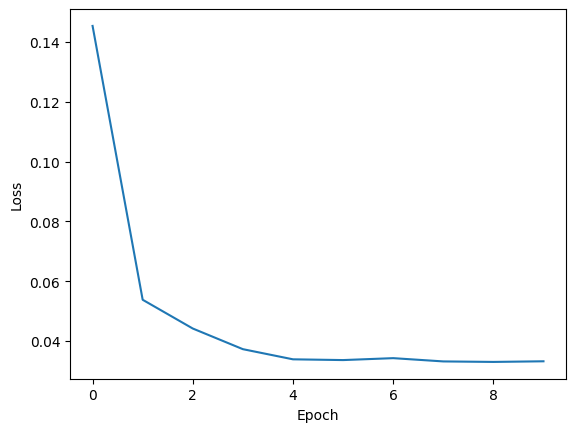

In [37]:
# Visualize the loss value over time
plt.plot(history.history["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

- Loss values become lower each time, indicating that the model is learning and improving its ability to make predictions.
- This could be a useful indicator to show that the model is learning well.

In [38]:
# Evaluate the model with MSE and RMSE metrics
test_predictions = model.predict(test_features)
mse = mean_squared_error(test_target, test_predictions)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

5/5 [==============================] - 2s 6ms/step
MSE: [1.4673312e-02 1.5287439e-04 1.9223707e-03 1.8287856e-02 4.7118705e-02
 5.5197179e-03 1.1195580e-02 3.5903306e-04 3.9376985e-02 1.0410105e-02
 2.2279611e-02 6.0869310e-02 3.3170758e-03 6.6226063e-04 1.1488418e-02
 1.9272583e-02 1.0426123e-02 7.3057741e-02 8.6756438e-02 2.8920031e-04
 1.2306357e-02 6.1577125e-03 2.7574647e-02 4.0059671e-04 1.3822091e-02
 4.6908397e-02 1.9783468e-03 3.5522163e-03 5.8001976e-02 4.8275440e-04
 1.3664302e-02 6.3296080e-02 4.5469023e-02 7.4709919e-03 6.4366028e-02
 2.9107162e-03 3.7480451e-02 4.4638287e-02 7.0775427e-02 5.0559867e-02
 4.2810324e-03 2.3082390e-02 1.5778784e-02 1.0963801e-01 9.1972791e-02
 9.6904412e-02 1.9283950e-02 6.8998367e-02 1.9910099e-02 6.4445078e-02
 4.5469023e-02 5.1801398e-02 1.5937203e-01 3.6564559e-02 2.5939888e-03
 3.2384537e-02 2.4083368e-02 2.0227535e-02 1.3482171e-01 1.0971879e-01
 1.1202129e-01 9.3510421e-03 2.2174867e-02 1.0063119e-01 2.5266079e-02
 1.5788311e-01 7.5509

- The MSE and RMSE value range are relatively small, indicating that the model is making good predictions.

In [39]:
# Save the model
model.save("lstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Using the model

In [40]:
from tensorflow.keras.models import load_model

In [41]:
# Load the model
model = load_model("lstm_model.h5")

# Define the input
precipitation = 0.0
relative_humidity = 0.5
temperature = 25.0

# Preprocess the input data
input_data = [[precipitation, relative_humidity, temperature]]
scaler = MinMaxScaler()
scaler.fit(input_data)
input_data_scaled = scaler.transform(input_data)

# Reshape the input data
input_data_scaled = np.array(input_data_scaled)
input_data_scaled = input_data_scaled.reshape(1, -1)

# Make the prediction
predicted_value = model.predict(input_data_scaled)
print(predicted_value)

1/1 [==============================] - 1s 1s/step
[[0.5471139]]


In [42]:
# Get the actual number of the courier_partners_online prediction

original_min = scaler.data_min_
original_max = scaler.data_max_

actual_value = predicted_value * (original_max[2] - original_min[2]) + original_min[2]

result = actual_value[0][0]

print(f"Number of courier partners online prediced based on given weather data: {result} courier partners online")


Number of courier partners online prediced based on given weather data: 25.0 courier partners online


## Chosen Model 2: Random Forest Model
- This is a regression problem (predicting the number of courier partners)
- Dataset is relatively small.
- Easy to train and interpret.

In [44]:
from sklearn.ensemble import RandomForestRegressor

# Create an instance of the RandomForestRegressor class
forest = RandomForestRegressor()

# Train the forest model on training data
forest.fit(train_features, train_target)

# Make predictions on the test data
y_pred = forest.predict(test_features)

# Evaluate the performance of the forest
mse = mean_squared_error(test_target, y_pred)
print("Mean squared error:", mse)

<ipython-input-44-ba2722aafca2>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(train_features, train_target)


Mean squared error: tf.Tensor(
[0.02602364 0.04118675 0.02809318 0.02602364 0.03663377 0.0243024
 0.07247202 0.03147005 0.0321094  0.02388849 0.0321094  0.02857269
 0.04118675 0.03147005 0.07247202 0.05485408 0.02388849 0.02446224
 0.02570396 0.03147005 0.11955975 0.05485408 0.02388849 0.03583457
 0.02388849 0.03663377 0.06316922 0.06316922 0.02446224 0.03147005
 0.06316922 0.04864546 0.04864546 0.02857269 0.0321094  0.02857269
 0.0321094  0.04214578 0.0321094  0.0321094  0.02446224 0.02570396
 0.02602364 0.05613278 0.10838423 0.03663377 0.0321094  0.0321094
 0.02446224 0.06460776 0.04864546 0.0321094  0.15158695 0.03663377
 0.03147005 0.0243024  0.02857269 0.03663377 0.12179748 0.18532704
 0.20367856 0.05613278 0.05613278 0.18532704 0.08452069 0.2869612
 0.15158695 0.08452069 0.04864546 0.05613278 0.22301774 0.10838423
 0.24334457 0.20367856 0.08452069 0.04864546 0.0740704  0.10838423
 0.09595863 0.08452069 0.13619839 0.06460776 0.05613278 0.04864546
 0.13619839 0.08452069 0.08452069 

- The MSE is low, which indicate that the predicted values are close to the actual values.

In [45]:
import pickle

# Save the model to a file
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(forest, file)

In [46]:
# Load the model from the file
with open('random_forest_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [47]:
new_predictions = loaded_model.predict(test_features)
print(test_predictions)

[[0.36775544]
 [0.32347536]
 [0.33393294]
 [0.3536563 ]
 [0.33848715]
 [0.34792742]
 [0.11641306]
 [0.3366074 ]
 [0.334897  ]
 [0.34241453]
 [0.3840698 ]
 [0.26439407]
 [0.25351706]
 [0.32982114]
 [0.32940626]
 [0.12784095]
 [0.34233606]
 [0.19637471]
 [0.10545554]
 [0.33854967]
 [0.02239932]
 [0.34513777]
 [0.2783883 ]
 [0.35334826]
 [0.32687706]
 [0.33897212]
 [0.28892305]
 [0.18484397]
 [0.22583067]
 [0.37752724]
 [0.12755004]
 [0.3484129 ]
 [0.38676536]
 [0.42467624]
 [0.27962875]
 [0.4571601 ]
 [0.33973467]
 [0.36650005]
 [0.26729685]
 [0.30847815]
 [0.40123707]
 [0.2480711 ]
 [0.36327526]
 [0.29110593]
 [0.4300632 ]
 [0.24426086]
 [0.3944667 ]
 [0.27065796]
 [0.32556352]
 [0.3905841 ]
 [0.38676536]
 [0.30573416]
 [0.40078574]
 [0.36433697]
 [0.30462435]
 [0.24226518]
 [0.35592297]
 [0.41333205]
 [0.3883748 ]
 [0.5132062 ]
 [0.53197086]
 [0.52552146]
 [0.47330996]
 [0.52722025]
 [0.52993584]
 [0.5582105 ]
 [0.52520984]
 [0.52113867]
 [0.5342574 ]
 [0.53438056]
 [0.54293346]
 [0.52

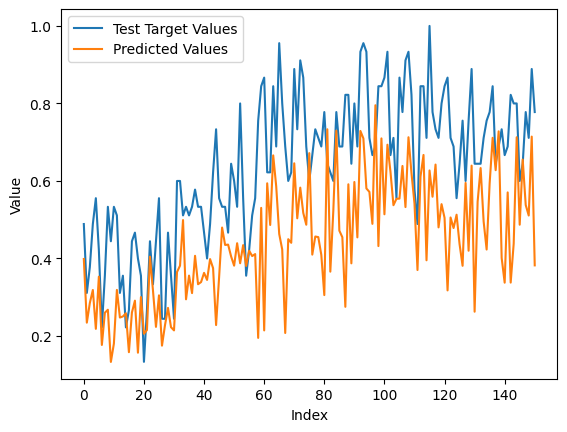

In [48]:
import matplotlib.pyplot as plt

plt.plot(test_target, label="Test Target Values")
plt.plot(new_predictions, label="Predicted Values")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

- The trend is there but it's a but lower than the test target values.

> Overall, both the model performed quite ok. The project has achieved its goal in creating models to predict the number of courier partners online using weather data points: temperature, relative humidity and precipitation. This could be a useful model, helping the company in allocating drivers on days of high and low demands, improving customer satisfaction, and bring more revenue to Wolt company.

## Further development

- LSTM is more of a black box model compared to random forest, but it has more sophistication in understanding the non-linear relationship between different data points.
- After this assignment has been submitted, I would like to do some further steps to make the solution even better:
 - Hyperparameter tuning.
 - Explore with different feature selection.
 - Explore the dataset as a time series dataset with ARIMA.
 - Examine the model more and understand the steps it took to reach to the prediction.

## My background and Wolt

- I really enjoy working on real-world problems by using real-world data. I think the amount of potential from the data we have is very untapped, especially on a youth-led movement level.

- That is why I founded the organization Youth coders for HIV/AIDS (https://youthcodersforhivaids.com/) .

- Our main goal is to work with valuable datasets to add values to the progress in the field.

- The data science project we are working on right now is HIV-1 Protease Cleavage Prediction. It is a very crucial element in HIV/AIDS that data could have a lot of impact in. HIV-1 protease cut a protein into smaller pieces in the protein chain.

- This cutting process is called cleavage. It is a crucial process to the formation and maturing of the HIV virus. If we can predict when/where the protease will cut, it could help us with medical prevention and intervention.

- Through data science and strong medical knowledge, movements like these are indispensable in promoting the fight for eradication of diseases and forming communities of youth and mentors from around the world.

- Our team consists of 4 members from Asia, Africa, Europe, and North America, which provides an amazing perspective and transfer of knowledge between the team members.

